$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
$

# Autoencoder Neural Networks

In [110]:
import numpy as np
import matplotlib.pyplot as plt
import neuralnetworksA4 as nn

import matplotlib.gridspec as gridspec
import pickle
import gzip

In [111]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xorig = np.vstack([a.reshape((28, 28, 1))[np.newaxis, :, :, :] for a in train_set[0]])
Torig = np.array(train_set[1]).reshape((-1,1))

Xtest = np.vstack([a.reshape((28,28,1))[np.newaxis,:,:,:] for a in test_set[0]])
Ttest = np.array(test_set[1]).reshape((-1,1))

Xorig.shape, Torig.shape, Xtest.shape, Ttest.shape

((50000, 28, 28, 1), (50000, 1), (10000, 28, 28, 1), (10000, 1))

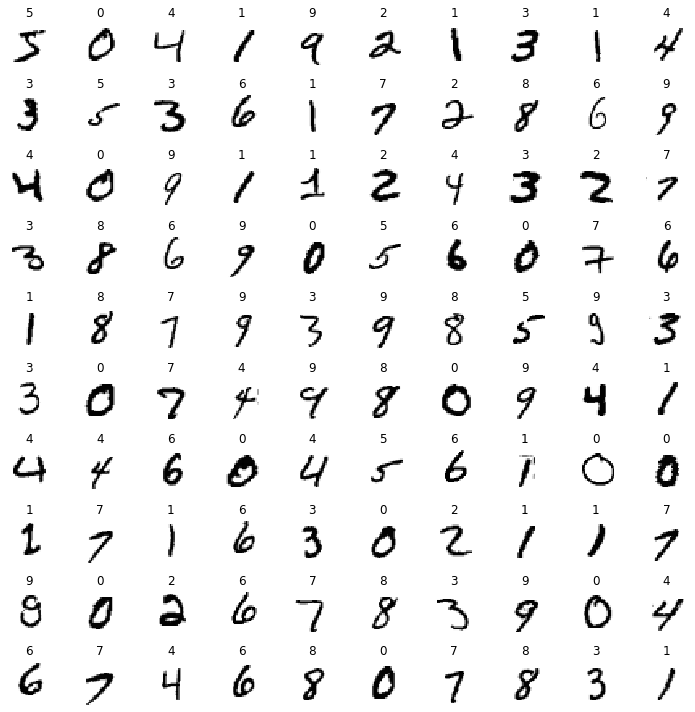

In [112]:
plt.figure(figsize=(10, 10))
for i in range(100):
    plt.subplot(10, 10, i + 1)
    plt.imshow(-Xorig[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')
    plt.title(str(Torig[i][0]))
plt.tight_layout()

For the rest of this notebook, we will be using just a total of 10,000 samples, with 1,000 samples of each digit.

In [113]:
if True:
    nEach = 1000
    useThese = []
    for digit in range(10):
        useThese += np.where(Torig == digit)[0][:nEach].tolist()
    useThese = np.array(useThese)
    np.random.shuffle(useThese)
    X = Xorig[useThese, :]
    T = Torig[useThese, :]
    del Xorig # to save memory
    del Torig
else:
    X = Xorig
    T = Torig
X.shape, T.shape

((10000, 28, 28, 1), (10000, 1))

Flatten each 28x28 image into a 784 vector.

In [114]:
X = X.reshape((-1,784))
X.shape

(10000, 784)

In [115]:
rowsShuffled = np.arange(X.shape[0])
np.random.shuffle(rowsShuffled)
nTrain = int(X.shape[0] * 0.8)
Xtrain = X[rowsShuffled[:nTrain], :]
Ttrain = T[rowsShuffled[:nTrain], :]
Xtest = X[rowsShuffled[nTrain:], :]
Ttest = T[rowsShuffled[nTrain:], :]
Xtrain.shape, Ttrain.shape, Xtest.shape, Ttest.shape

((8000, 784), (8000, 1), (2000, 784), (2000, 1))

Adam: Epoch 400 Error=0.82780
Adam: Epoch 800 Error=0.82128
Adam: Epoch 1200 Error=0.78953
Adam: Epoch 1600 Error=0.76312
Adam: Epoch 2000 Error=0.73236
Adam: Epoch 2400 Error=0.71422
Adam: Epoch 2800 Error=0.69306
Adam: Epoch 3200 Error=0.67952
Adam: Epoch 3600 Error=0.66970
Adam: Epoch 4000 Error=0.66191


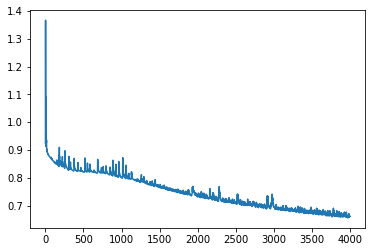

In [147]:
nnet = nn.NeuralNetwork(784, [1000, 100, 50, 2, 50, 100, 1000], 784)
nnet.train(Xtrain, Xtrain, 4000, 0.01, method='adam', verbose=True)
plt.plot(nnet.error_trace);

In [148]:
Y = nnet.use(X)

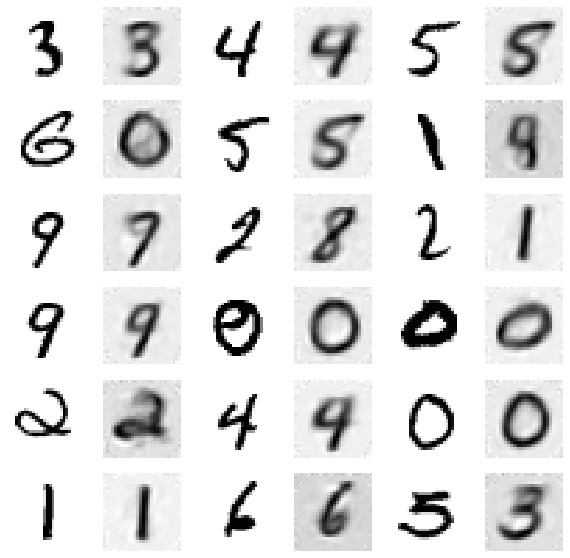

In [149]:
plt.figure(figsize=(10, 10))
for i in range(0, 36, 2):
    plt.subplot(6, 6, i + 1)
    plt.imshow(-X[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')
    plt.subplot(6, 6, i + 2)
    plt.imshow(-Y[i, :].reshape((28, 28)), interpolation='nearest', cmap='gray')
    plt.axis('off')

In [150]:
nnet

NeuralNetwork(784, [1000, 100, 50, 2, 50, 100, 1000], 784, 'tanh')

In [151]:
nnet.use(Xtrain);

In [152]:
nnet.Ys[4].shape, Ttrain.shape

((8000, 2), (8000, 1))

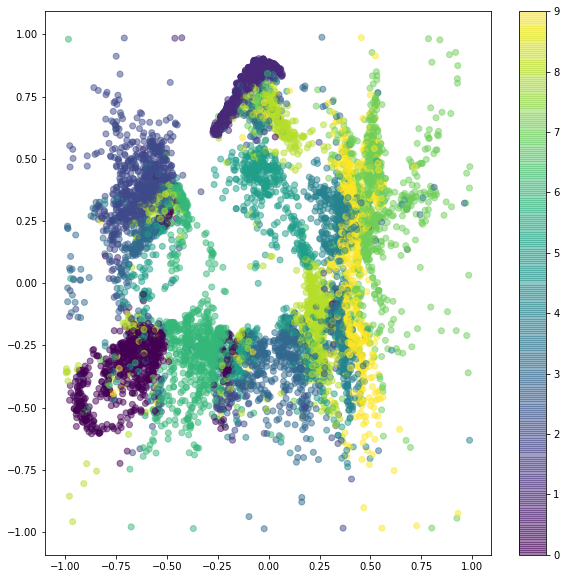

In [153]:
bottle_neck = nnet.Ys[4]
plt.figure(figsize=(10, 10))
plt.scatter(bottle_neck[:, 0], bottle_neck[:, 1], c=Ttrain.flat, alpha=0.5)
plt.colorbar()

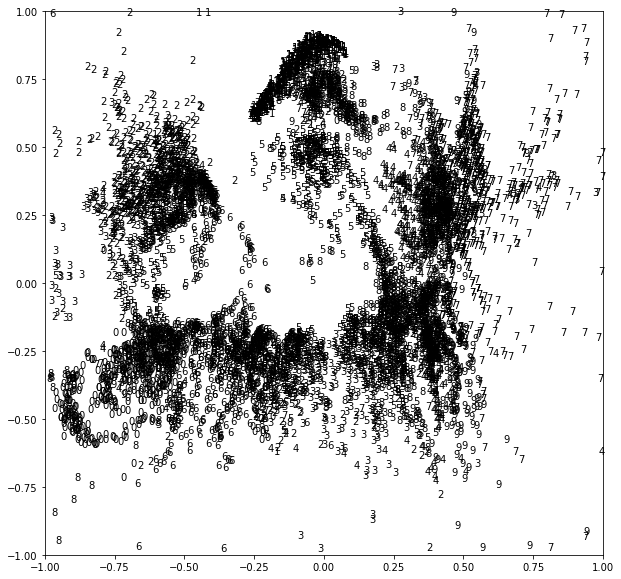

In [154]:
plt.figure(figsize=(10, 10))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
for i, txt in enumerate(Ttrain.flat):
    plt.annotate(txt, (bottle_neck[i, 0], bottle_neck[i, 1]))

In [155]:
nnet.Ys[4].shape

(8000, 2)

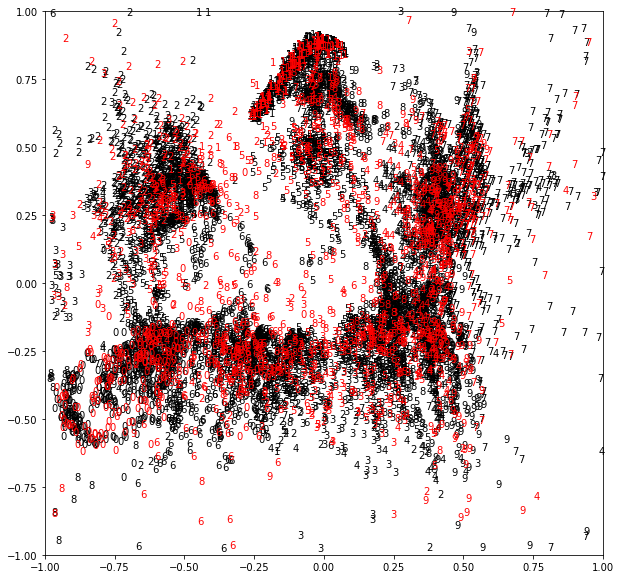

In [156]:
plt.figure(figsize=(10, 10))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
for i, txt in enumerate(Ttrain.flat):
    plt.annotate(txt, (bottle_neck[i, 0], bottle_neck[i, 1]))
    
nnet.use(Xtest)
bottleTest = nnet.Ys[4]
for i, txt in enumerate(Ttest.flat):
    plt.annotate(txt, bottleTest[i, :], color='r');

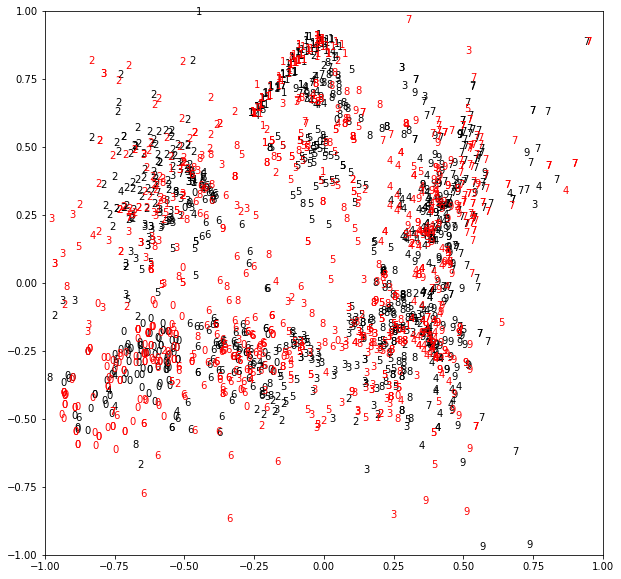

In [157]:
just_show_these = np.random.choice(range(Ttrain.shape[0]), 1000)

plt.figure(figsize=(10, 10))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
for i in just_show_these:
    digit = Ttrain[i, 0]
    plt.annotate(digit, (bottle_neck[i, 0], bottle_neck[i, 1]))
    
just_show_these = np.random.choice(range(Ttest.shape[0]), 1000)
for i in just_show_these:
    digit = Ttest[i, 0]
    plt.annotate(digit, bottleTest[i, :], color='r');

In [158]:
def add_subplot_axes(ax, rect, axisbg='w'):                                       
    ''' See http://stackoverflow.com/questions/17458580/embedding-small-plots-inside-subplots-in-matplotlib'''                                                 
    fig = plt.gcf()                                                             
    box = ax.get_position()                                                     
    width = box.width                                                           
    height = box.height                                                         
    inax_position  = ax.transAxes.transform(rect[0:2])                          
    transFigure = fig.transFigure.inverted()                                    
    infig_position = transFigure.transform(inax_position)                       
    x = infig_position[0]                                                       
    y = infig_position[1]                                                       
    width *= rect[2]                                                            
    height *= rect[3]  # <= Typo was here                                       
    subax = fig.add_axes([x, y, width, height], facecolor=axisbg)               
    x_labelsize = subax.get_xticklabels()[0].get_size()                         
    y_labelsize = subax.get_yticklabels()[0].get_size()                         
    x_labelsize *= rect[2]**0.5                                                 
    y_labelsize *= rect[3]**0.5                                                 
    subax.xaxis.set_tick_params(labelsize=x_labelsize)                          
    subax.yaxis.set_tick_params(labelsize=y_labelsize)                          
    return subax 

In [159]:
bottleTest


array([[-0.98252899,  0.23929388],
       [-0.61137434, -0.30159239],
       [ 0.15459864,  0.22072579],
       ...,
       [ 0.19603867, -0.19600395],
       [-0.54039132,  0.53888612],
       [ 0.1188692 , -0.42938044]])

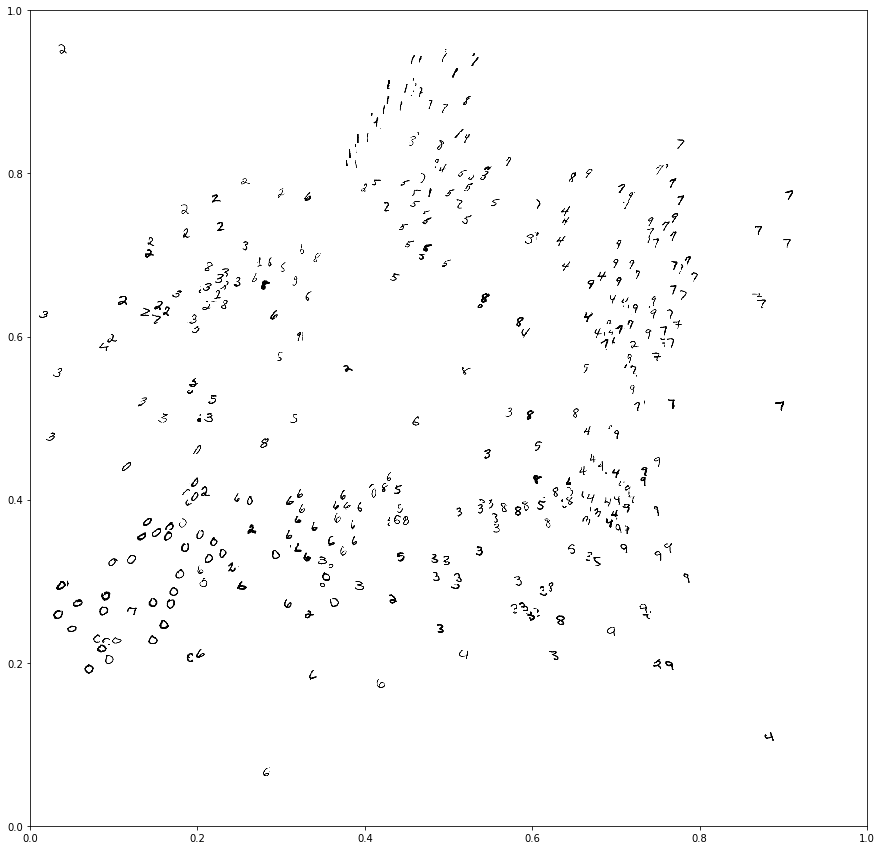

In [160]:
fig, main_ax = plt.subplots(figsize=(15, 15))

for i in range(400):
    Xi = Xtest[i, :].reshape(28, 28)
    Ti = Ttest[i, :]
    coords = bottleTest[i, :] * 0.5 + 0.5
    ax = add_subplot_axes(main_ax, [coords[0], coords[1], 0.015, 0.015])
    ax.imshow(-Xi, cmap='gray')
    ax.axis('off')